예측할 제품명을 입력하세요:  Long-Sleeve Logo Jersey, L


12:16:46 - cmdstanpy - INFO - Chain [1] start processing
12:16:46 - cmdstanpy - INFO - Chain [1] done processing
/home/id/VENV/vdjango/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


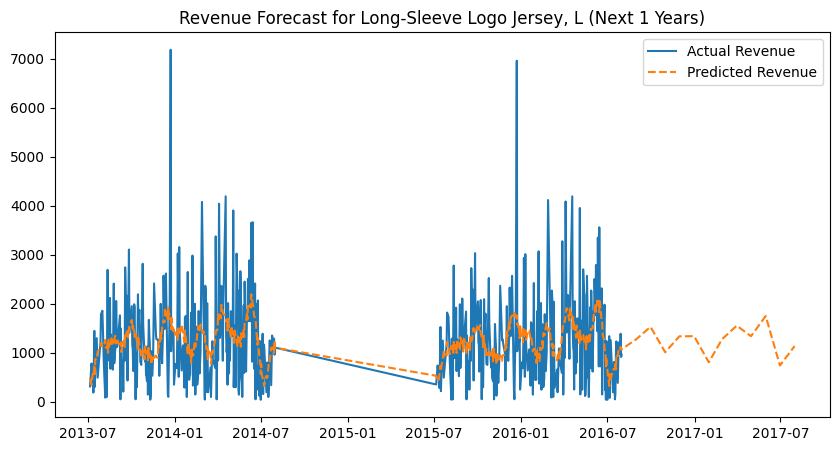

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# CSV 파일 로드
file_path = "sales_data.csv"
df = pd.read_csv(file_path)

# 날짜 변환
df['Date'] = pd.to_datetime(df['Date'])

# 특정 제품 입력
product_name = input("예측할 제품명을 입력하세요: ")

# 특정 제품만 필터링
df_product = df[df['Product'] == product_name]

# Prophet이 요구하는 컬럼명으로 변경
df_product = df_product.rename(columns={'Date': 'ds', 'Revenue': 'y'})

df_product = df_product[['ds', 'y']].groupby('ds').sum().reset_index()

# Prophet 모델 학습
model = Prophet()
model.fit(df_product)

# 미래 예측 데이터프레임 생성 (3년 예측)
future = model.make_future_dataframe(periods=12, freq='M')  # 12개월 예측
forecast = model.predict(future)

# 결과 시각화
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_product['ds'], df_product['y'], label='Actual Revenue')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted Revenue', linestyle='dashed')
ax.set_title(f'Revenue Forecast for {product_name} (Next 1 Years)')
ax.legend()
plt.show()
